# Visualization of Quantum Speedup
## Franziska Brändle, Luan Wei, Turan Orujlu, Tim Brockmeyer
### Universität Osnabrück (Oct. 2018)

Quantum speed up, or “quantum computational supremacy”, refers to the asymptotic behaviour of quantum algorithms outperforming classical algorithms [1]. For example, in factorization problems, a quantum algorithm is exponentially faster than the fastest known classical algorithm.

According to the extended Church-Turing thesis, all classical computers are equivalent up to polynomial factors [2]. Since all proposed models of quantum computation are polynomially equivalent, a finding of exponential quantum speedup should be model-independent [2]. Therefore, we can extend this idea to our comparison of quantum and classical algorithms and use a universal measure, at least in the case when the quantum speedup is exponential.

### Run-times of sample algorithms given input size N

Shor's Algorithm:
$$ O \left( \left( {log \left( N \right) ^ 2} \right) \cdot \left( log \left( log \left( N \right) \right) \right) \cdot \left( log \left( log \left( log \left( N \right) \right) \right) \right) \right). $$
The most efficient known classical factoring algorithm:
$$ O \left( e^{1.9 \cdot {log \left( N \right)}^{\frac{1}{3}} \cdot {\left( log \left( log \left( N \right) \right) \right)}^{\frac{2}{3}}} \right). $$
Grover's Algorithm:
$$ O \left( \sqrt{N} \right). $$
The analogous problem in classical computation:
$$ O \left( N \right). $$
HHL (k is condition number):
$$ O \left( log \left( N \right) \cdot {k^2} \right). $$
The fastest classical solver of linear system of equations (k is condition number):
$$ O \left( N \cdot k \right). $$
Simon's Algorithm:
$$ \Theta \left( N \right). $$
The analogous problem in classical computation:
$$ \Omega \left( 2^{\frac{N}{2}} \right). $$
Quantum Fourier Transform:
$$ O \left( N^2 \right). $$
Discrete Fourier Transform:
$$ O \left( N \cdot 2^N \right). $$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def shor(N):
    """ Calculates run-time of Shor's Algorithm.
        
        :param N: input size
    """
    return (np.log2(N)**2)*np.log2(np.log2(N))*np.log2(np.log2(np.log2(N)))

def factorization(N):
    """ Calculates the run-time of the most efficient
        known classical factoring algorithm. 
        
        :param N: input size
    """
    return np.exp(1.9*(np.log2(N)**(1/3))*(np.log2(np.log2(N))**(2/3)))

def grover(N):
    """ Calculates the run-time of Grover's Algorithm.
    
        :param N: input size
    """
    return np.sqrt(N)

def classical_grover(N):
    """ Calculates the run-time of the classical
        analogue of Grover's Algorithm.
    
        :param N: input size
    """
    return N

def hhl(N,k):
    """ Calculates the run-time of the HHL Algorithm.
    
        :param N: input size
        :param k: condition number
    """
    return np.log2(N)*(k**2)

def lin_sys_solver(N,k):
    """ Calculates the run-time of fastest classical
        solver of linear system of equations, Ax = b.
    
        :param N: input size
        :param k: condition number
    """
    return N*k

def simon(N):
    """ Calculates the run-time of Simon's Algorithm.
    
        :param N: input size
    """
    return N

def classical_simon(N):
    """ Calculates the run-time of the classical
        analogue of Simon's Algorithm.
    
        :param N: input size
    """
    return 2**(N/2)

def quant_fourier(N):
    """ Calculates the run-time of the Quantum Fourier Transform.
    
        :param N: input size
    """
    return N**2

def classical_fourier(N):
    """ Calculates the run-time of the Discrete Fourier Transform.
    
        :param N: input size
    """
    return N*(2**N)

### log-log plots of the run-time of the above algorithms

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log2
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log2
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


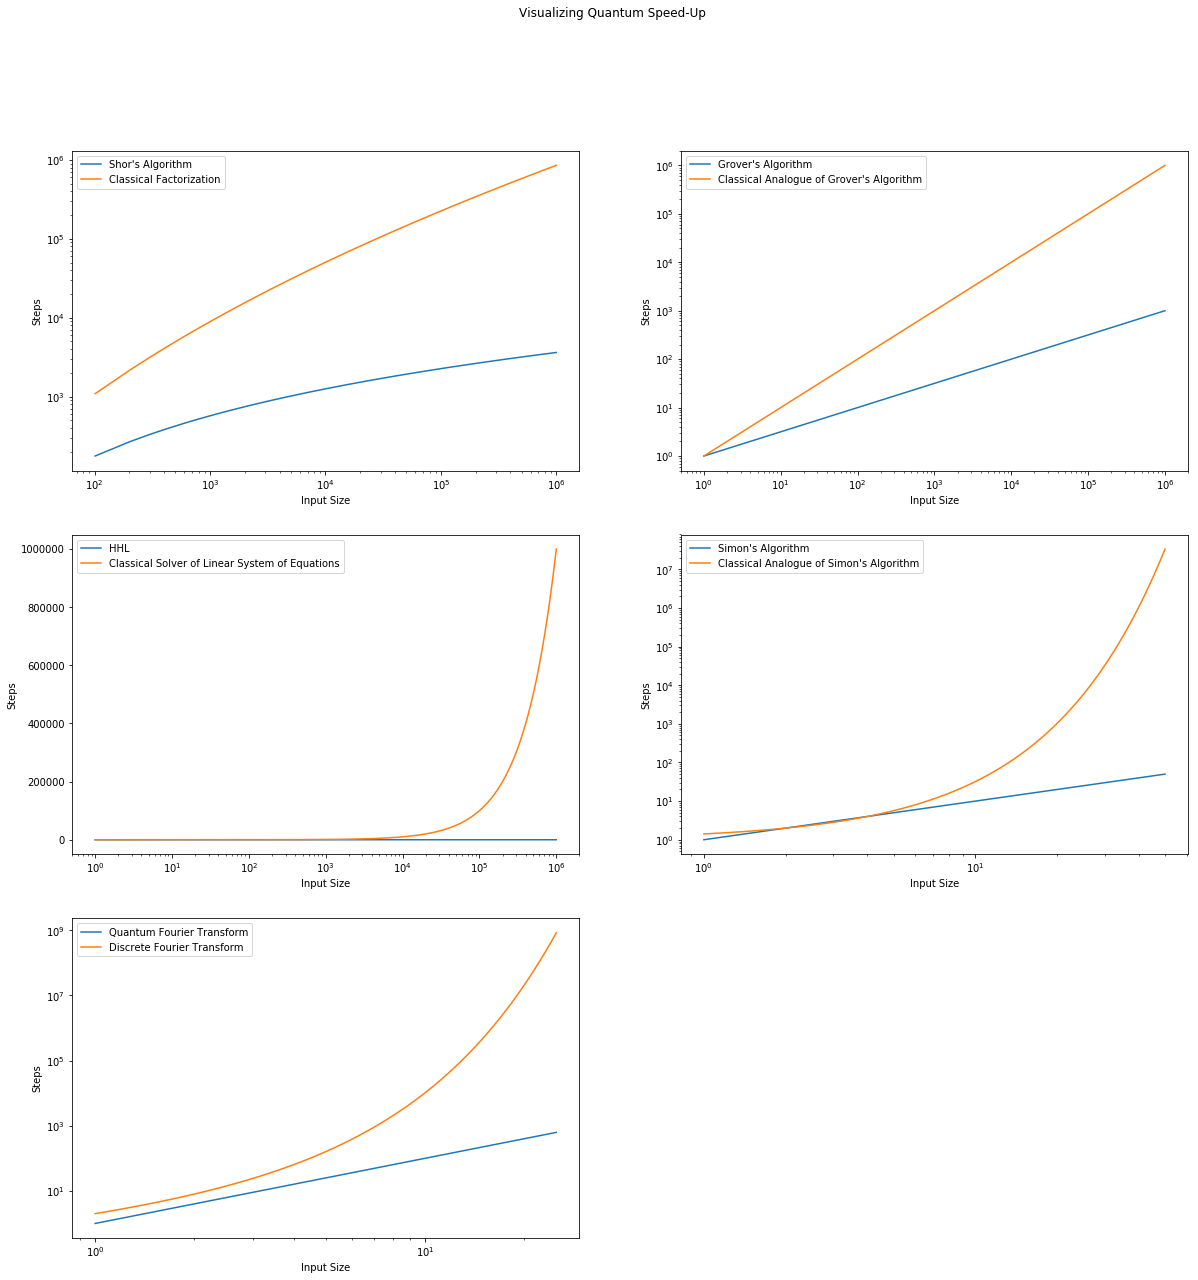

In [2]:
# list of input sizes
x = np.linspace(1, 1000000, num=10000)
x1 = np.linspace(1, 50, num=10000)
x2 = np.linspace(1, 25, num=10000)

# runtimes of the above algorithms for each input size
y1 = shor(x)
y2 = factorization(x)
y3 = grover(x)
y4 = classical_grover(x)
y5 = hhl(x, 1)
y6 = lin_sys_solver(x, 1)
y7 = simon(x1)
y8 = classical_simon(x1)
y9 = quant_fourier(x2)
y10 = classical_fourier(x2)

# plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.suptitle('Visualizing Quantum Speed-Up')

axes[0, 0].set_xlabel('Input Size')
axes[0, 0].set_ylabel('Steps')
axes[0, 0].loglog(x, y1, label = "Shor's Algorithm")
axes[0, 0].loglog(x, y2, label = 'Classical Factorization')
axes[0, 0].legend()

axes[0, 1].set_xlabel('Input Size')
axes[0, 1].set_ylabel('Steps')
axes[0, 1].loglog(x, y3, label = "Grover's Algorithm")
axes[0, 1].loglog(x, y4, label = "Classical Analogue of Grover's Algorithm")
axes[0, 1].legend()

# log-log plot results in a kink for the graph of hhl due to
# large differences between the two run-times. because of that
# we are using semi-log-x here
axes[1, 0].set_xlabel('Input Size')
axes[1, 0].set_ylabel('Steps')
axes[1, 0].semilogx(x, y5, label = "HHL")
axes[1, 0].semilogx(x, y6, label = "Classical Solver of Linear System of Equations")
axes[1, 0].legend()

axes[1, 1].set_xlabel('Input Size')
axes[1, 1].set_ylabel('Steps')
axes[1, 1].loglog(x1, y7, label = "Simon's Algorithm")
axes[1, 1].loglog(x1, y8, label = "Classical Analogue of Simon's Algorithm")
axes[1, 1].legend()

axes[2, 0].set_xlabel('Input Size')
axes[2, 0].set_ylabel('Steps')
axes[2, 0].loglog(x2, y9, label = "Quantum Fourier Transform")
axes[2, 0].loglog(x2, y10, label = "Discrete Fourier Transform")
axes[2, 0].legend()

axes[2, 1].remove() 

plt.show()

Quantum speedup was defined by T. F. Rønnow et al. (2014) as the asymptotic ratio,
$$S(N) = \frac{C(N)}{Q(N)}$$ where $C(N)$ is the time it takes for a classical algorithm to solve problem of
size $N$, and $Q(N)$ is the time it takes using a quantum device, for $N\xrightarrow[]{} \infty$. 

### plots of the run-time of the above algorithms

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


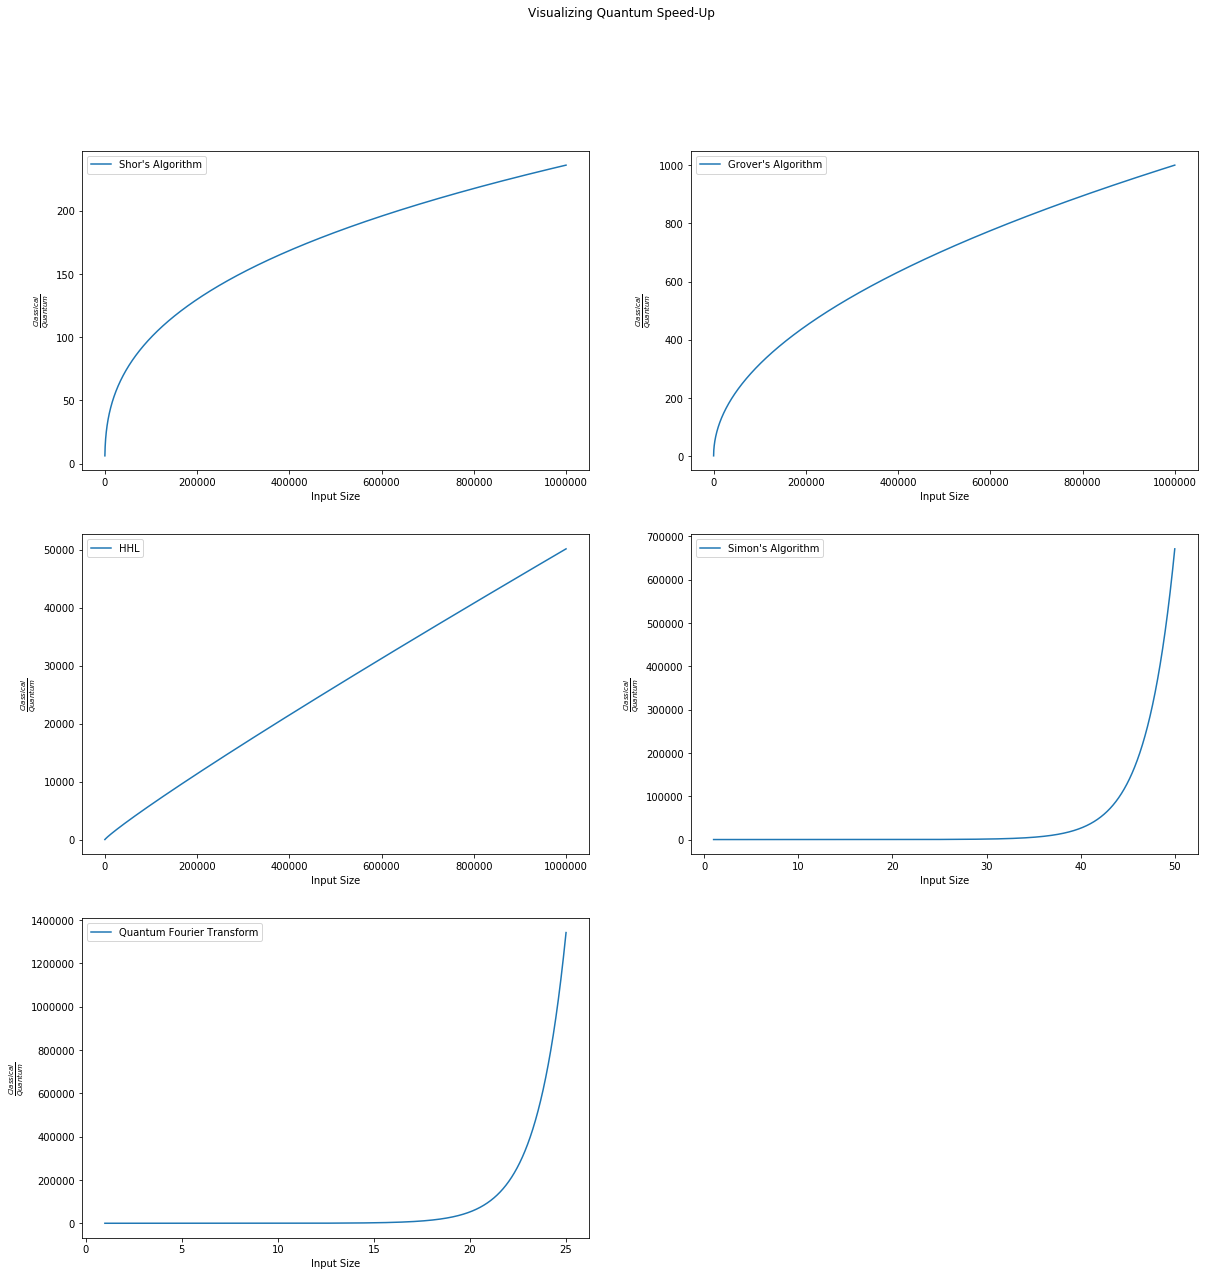

In [3]:
# quantum speedup, i.e., asymptotic ration, for each input size
y11 = np.linspace(1, 1000000, num=10000)
y22 = np.linspace(1, 1000000, num=10000)
y33 = np.linspace(1, 1000000, num=10000)
y44 = np.linspace(1, 1000000, num=10000)
y55 = np.linspace(1, 1000000, num=10000)
for i in range(10000):
    y11[i] = y2[i]/y1[i]
    y22[i] = y4[i]/y3[i]
    y33[i] = y6[i]/y5[i]
    y44[i] = y8[i]/y7[i]
    y55[i] = y10[i]/y9[i]

# plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.suptitle('Visualizing Quantum Speed-Up')

axes[0, 0].set_xlabel('Input Size')
axes[0, 0].set_ylabel(r'$\frac{Classical}{Quantum}$')
axes[0, 0].plot(x, y11, label = "Shor's Algorithm")
axes[0, 0].legend()

axes[0, 1].set_xlabel('Input Size')
axes[0, 1].set_ylabel(r'$\frac{Classical}{Quantum}$')
axes[0, 1].plot(x, y22, label = "Grover's Algorithm")
axes[0, 1].legend()

axes[1, 0].set_xlabel('Input Size')
axes[1, 0].set_ylabel(r'$\frac{Classical}{Quantum}$')
axes[1, 0].plot(x, y33, label = "HHL")
axes[1, 0].legend()

axes[1, 1].set_xlabel('Input Size')
axes[1, 1].set_ylabel(r'$\frac{Classical}{Quantum}$')
axes[1, 1].plot(x1, y44, label = "Simon's Algorithm")
axes[1, 1].legend()

axes[2, 0].set_xlabel('Input Size')
axes[2, 0].set_ylabel(r'$\frac{Classical}{Quantum}$')
axes[2, 0].plot(x2, y55, label = "Quantum Fourier Transform")
axes[2, 0].legend()

axes[2, 1].remove() 

plt.show()

### Results

We plotted the speed of various algorithms to compare the quantum versus classical performance. From our visualization results, quantum outperformed classical algorithms in every scenario, but at different speedup ratios. For Grover's
algorithm, quantum results strongly outperformed classical more than for Shor's algorithm. For HHL, quantum advantage was larger than in Grover's.  For Simon's algorithm and Quantum Fourier Transform, the speedup ratio becomes exponentially large and does not plot properly after a certain input size.  

### References
[1] Juan Bermejo-Vega, Dominik Hangleiter, Martin Schwarz, Robert Raussendorf, and Jens Eisert (2017)
_Architectures for quantum simulation showing a quantum speedup_. 
Retrieved from https://arxiv.org/pdf/1703.00466.pdf
 
[2] Troels F. Rønnow1, Zhihui Wang, Joshua Job, Sergio Boixo, Sergei V. Isakov, David
Wecker, John M. Martinis (2014)
_Defining and detecting quantum speedup_. 
Retrieved from http://science.sciencemag.org/content/345/6195/420